<a href="https://colab.research.google.com/github/fatima1846/python-and-AI-boot-camp-assignment-2/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving fetal_health.csv to fetal_health.csv


{'fetal_health.csv': b'baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health\n120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0\n132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0\n133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0\n134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0\n132.0,0.007,0.0,0.008,0.0,0.0,0.0,16.0,2.4,0.0,19.9,

In [ ]:
#installing the important libraries
!pip install matplotlib seaborn plotly pandas scikit-learn
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV



1-Data Handling

In [ ]:
#reading dataset
df=pd.read_csv("/content/fetal_health.csv")
#initial checks
print ("shape of dataset:",df.shape)
print("\n First five rows of dataset:")
print(df.head())
print("\n information of dataset:")
print(df.info())

#handling missing values & duplicates
print("\n Missing values:",df.isnull().sum())
df=df.dropna()

print("\n Number of duplicates:",df.duplicated().sum())
#categorical features into numeric form
df=pd.get_dummies(df,drop_first=True)
print("numerical form:",df.shape)

shape of dataset: (2126, 22)

 First five rows of dataset:
   baseline value  accelerations  ...  histogram_tendency  fetal_health
0           120.0          0.000  ...                 1.0           2.0
1           132.0          0.006  ...                 0.0           1.0
2           133.0          0.003  ...                 0.0           1.0
3           134.0          0.003  ...                 1.0           1.0
4           132.0          0.007  ...                 1.0           1.0

[5 rows x 22 columns]

 Missing values: baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                 

2- Exploratory data analysis


 Summary of dataset:
       baseline value  accelerations  ...  histogram_tendency  fetal_health
count     2126.000000    2126.000000  ...         2126.000000   2126.000000
mean       133.303857       0.003178  ...            0.320320      1.304327
std          9.840844       0.003866  ...            0.610829      0.614377
min        106.000000       0.000000  ...           -1.000000      1.000000
25%        126.000000       0.000000  ...            0.000000      1.000000
50%        133.000000       0.002000  ...            0.000000      1.000000
75%        140.000000       0.006000  ...            1.000000      1.000000
max        160.000000       0.019000  ...            1.000000      3.000000

[8 rows x 22 columns]


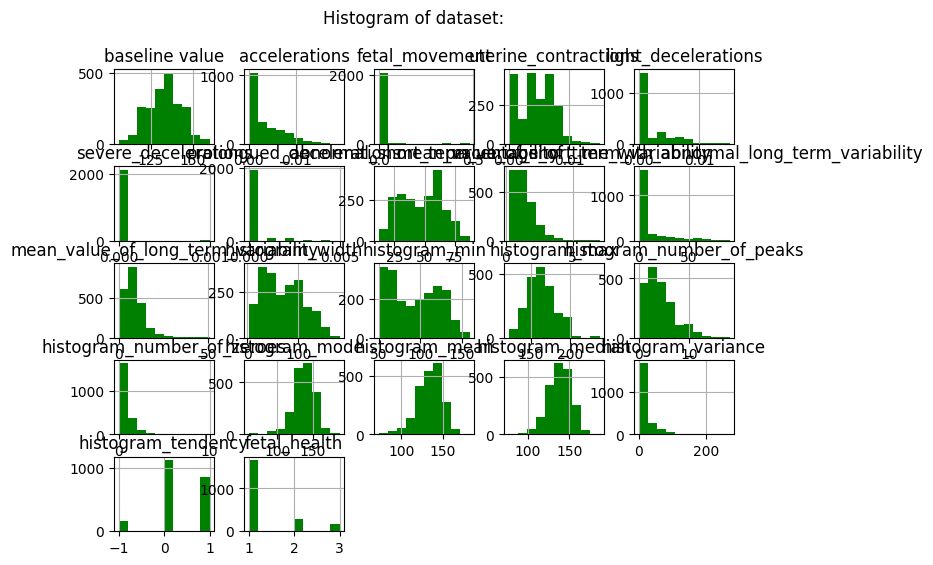

In [ ]:
#basic statistics
print("\n Summary of dataset:")
print(df.describe())

#visualizing data
#histogram
df.hist(figsize=(8,6),bins=10,color='green')
plt.suptitle("Histogram of dataset:")
plt.show()


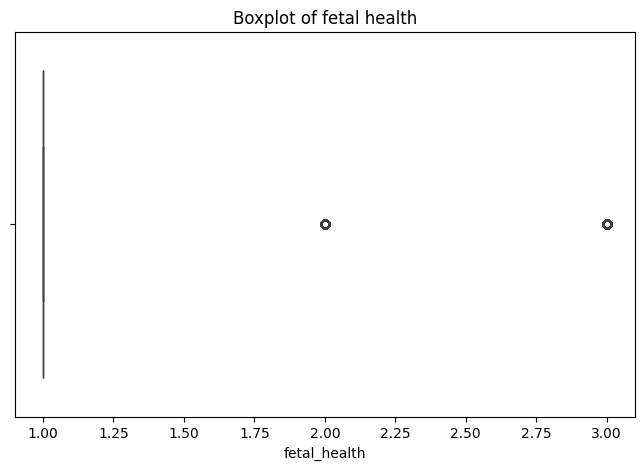

In [ ]:
#boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=df['fetal_health'])
plt.title("Boxplot of fetal health")
plt.show()






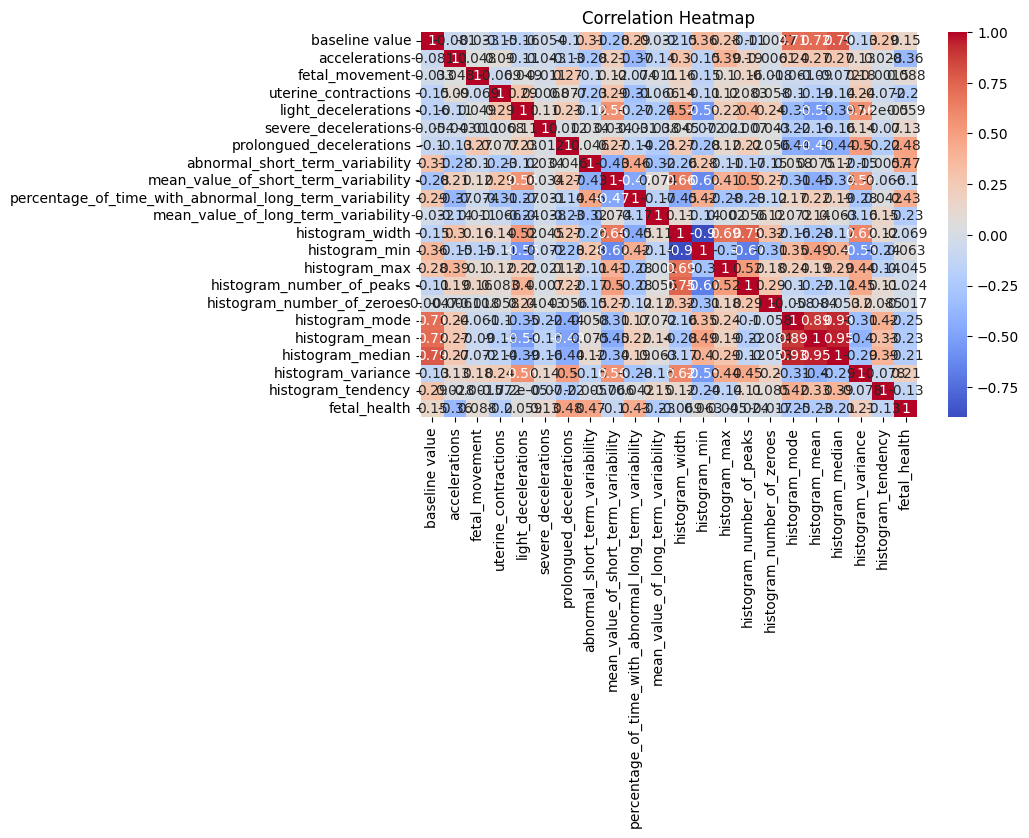

In [ ]:
#interactive plot
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


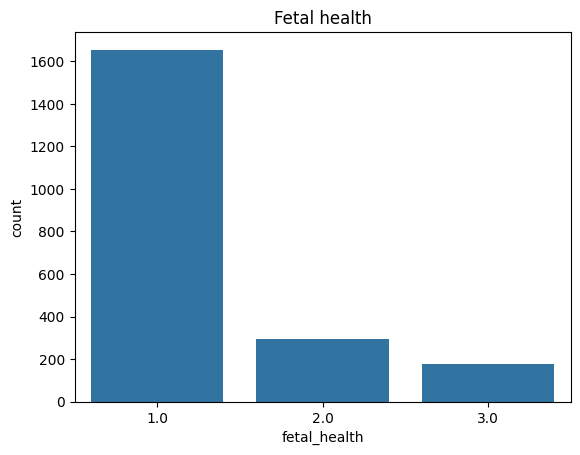

In [ ]:
#countplot
sns.countplot(x='fetal_health',data=df)
plt.title("Fetal health")
plt.show()

3-Feature Engineering

In [ ]:
#splitting dataset
x=df.drop('fetal_health',axis=1)
y=df['fetal_health']

#normalization/scaling
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
#train/test split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)
print("Training data:")
print(x_train.shape)
print("Test set:")
print(x_test.shape)

Training data:
(1700, 21)
Test set:
(426, 21)


4-Model Training

In [ ]:
#knn
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
acc_knn=accuracy_score(y_test,y_pred_knn)
#decision tree
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
acc_dt=accuracy_score(y_test,y_pred_dt)
#random forest
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
acc_rf=accuracy_score(y_test,y_pred_rf)
#comparing results
print(f"KNN Accuracy:{acc_knn:.2f}")
print(f"Decision tree Accuracy:{acc_dt:.2f}")
print(f"Random forest accuracy:{acc_rf:.2f}")








KNN Accuracy:0.92
Decision tree Accuracy:0.92
Random forest accuracy:0.92


5-Feature importance

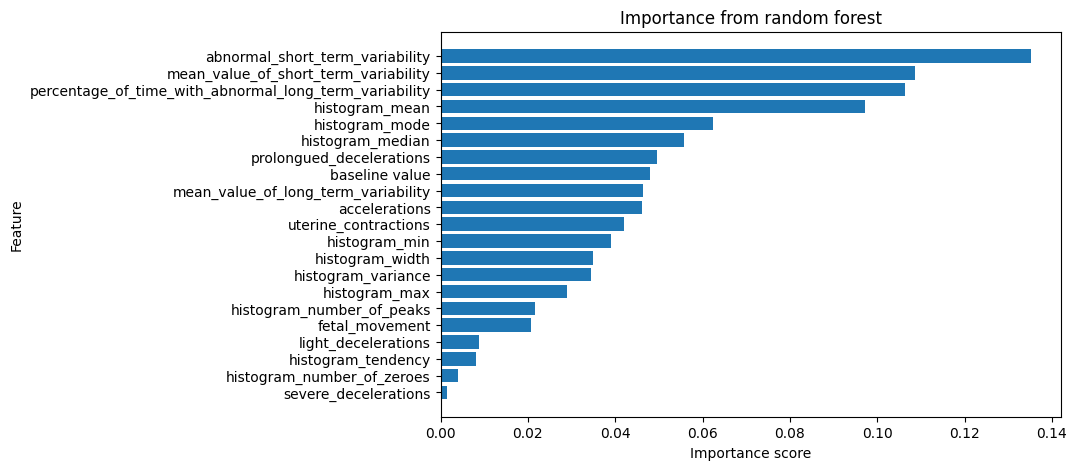

In [ ]:
#from random forest
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
importances=rf.feature_importances_
feature_names=x.columns
feat_importance_df=pd.DataFrame({
    "Feature":feature_names,
    "importance":importances
}).sort_values(by="importance",ascending=False)
plt.figure(figsize=(8,5))
plt.barh(feat_importance_df["Feature"],
         feat_importance_df["importance"])
plt.xlabel("Importance score")
plt.ylabel("Feature")
plt.title("Importance from random forest")
plt.gca().invert_yaxis()
plt.show()

6-Hyperparameter tuning

In [ ]:
#optimisation of hyperparameters
knn_params = {
    'n_neighbors': range(3, 15),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

dt_params = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15, 20],

}

rf_params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15],

}

# Dictionary to store all results
results = {}

# KNN Tuning
print(" Tuning KNN...")
knn_search = RandomizedSearchCV(
    KNeighborsClassifier(), knn_params, n_iter=10, cv=5, random_state=42
)
knn_search.fit(x_train, y_train)
best_knn = knn_search.best_estimator_
y_pred_knn_tuned = best_knn.predict(x_test)
acc_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)
results['KNN'] = acc_knn_tuned
print(" KNN tuned!")

# Decision Tree Tuning
print("Tuning Decision Tree...")
dt_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42), dt_params, n_iter=15, cv=5, random_state=42
)
dt_search.fit(x_train, y_train)
best_dt = dt_search.best_estimator_
y_pred_dt_tuned = best_dt.predict(x_test)
acc_dt_tuned = accuracy_score(y_test, y_pred_dt_tuned)
results['Decision Tree'] = acc_dt_tuned
print(" Decision Tree tuned!")

# Random Forest Tuning
print(" Tuning Random Forest...")
rf_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42), rf_params, n_iter=15, cv=5, random_state=42
)
rf_search.fit(x_train, y_train)
best_rf = rf_search.best_estimator_
y_pred_rf_tuned = best_rf.predict(x_test)
acc_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
results['Random Forest'] = acc_rf_tuned
print("Random Forest tuned!")

# Print all results
print("\n" + "="*60)
print(" FINAL TUNED ACCURACIES:")
print("="*60)
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")

# Find best model
best_model = max(results, key=results.get)
print(f"\n BEST MODEL: {best_model} ({results[best_model]:.4f})")




 Tuning KNN...
 KNN tuned!
Tuning Decision Tree...
 Decision Tree tuned!
 Tuning Random Forest...
Random Forest tuned!

 FINAL TUNED ACCURACIES:
KNN: 0.9202
Decision Tree: 0.9272
Random Forest: 0.9460

 BEST MODEL: Random Forest (0.9460)


In [ ]:
# BRIEF DEFAULT VS TUNED COMPARISON
results = []

# 1. KNN Comparison
knn_default = KNeighborsClassifier().fit(x_train, y_train)
knn_tuned = KNeighborsClassifier(n_neighbors=7, weights='distance', p=1).fit(x_train, y_train)

results.append({
    'Model': 'KNN',
    'Default': accuracy_score(y_test, knn_default.predict(x_test)),
    'Tuned': accuracy_score(y_test, knn_tuned.predict(x_test))
})

# 2. Decision Tree Comparison
dt_default = DecisionTreeClassifier(random_state=42).fit(x_train, y_train)
dt_tuned = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42).fit(x_train, y_train)

results.append({
    'Model': 'Decision Tree',
    'Default': accuracy_score(y_test, dt_default.predict(x_test)),
    'Tuned': accuracy_score(y_test, dt_tuned.predict(x_test))
})

# 3. Random Forest Comparison
rf_default = RandomForestClassifier(random_state=42).fit(x_train, y_train)
rf_tuned = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42).fit(x_train, y_train)

results.append({
    'Model': 'Random Forest',
    'Default': accuracy_score(y_test, rf_default.predict(x_test)),
    'Tuned': accuracy_score(y_test, rf_tuned.predict(x_test))
})

# Print results
print(" DEFAULT VS TUNED COMPARISON")
print("="*40)
for result in results:
    imp = result['Tuned'] - result['Default']
    print(f"{result['Model']:15} Default: {result['Default']:.3f} | Tuned: {result['Tuned']:.3f} | Improvement: {imp:+.3f}")

 DEFAULT VS TUNED COMPARISON
KNN             Default: 0.915 | Tuned: 0.923 | Improvement: +0.007
Decision Tree   Default: 0.923 | Tuned: 0.932 | Improvement: +0.009
Random Forest   Default: 0.946 | Tuned: 0.948 | Improvement: +0.002


7-Model Evaluation


KNN Evaluation:
Accuracy: 0.9154929577464789
              precision    recall  f1-score   support

      class1       0.94      0.97      0.96       333
      class2       0.81      0.69      0.75        64
      class3       0.79      0.76      0.77        29

    accuracy                           0.92       426
   macro avg       0.85      0.81      0.82       426
weighted avg       0.91      0.92      0.91       426



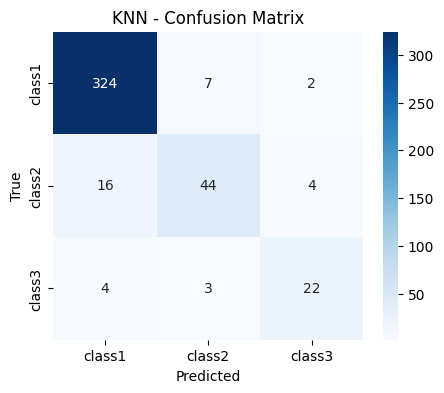


Decision Tree Evaluation:
Accuracy: 0.9225352112676056
              precision    recall  f1-score   support

      class1       0.96      0.94      0.95       333
      class2       0.75      0.81      0.78        64
      class3       0.93      0.93      0.93        29

    accuracy                           0.92       426
   macro avg       0.88      0.90      0.89       426
weighted avg       0.92      0.92      0.92       426



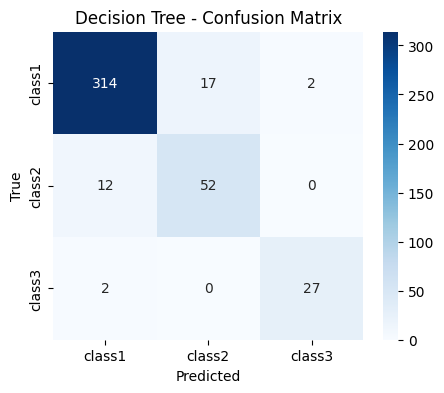


Random Forest Evaluation:
Accuracy: 0.9225352112676056
              precision    recall  f1-score   support

      class1       0.96      0.94      0.95       333
      class2       0.75      0.81      0.78        64
      class3       0.93      0.93      0.93        29

    accuracy                           0.92       426
   macro avg       0.88      0.90      0.89       426
weighted avg       0.92      0.92      0.92       426



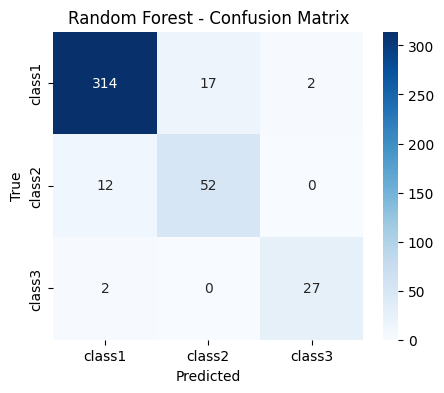

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



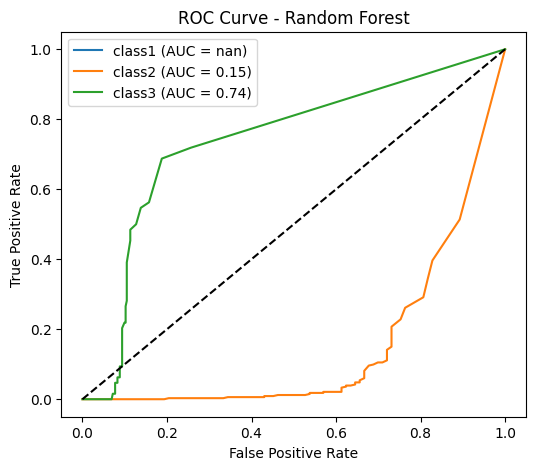

In [ ]:
class_names = ['class1', 'class2', 'class3']
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
def evaluate_model(name, y_test, y_pred):
    print(f"\n{name} Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=class_names))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# --- Evaluate All Models ---
evaluate_model("KNN", y_test, y_pred_knn)
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)

# --- ROC Curve for Best Model (Random Forest in this case) ---
# Need to binarize labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0,1,2])
y_score_rf = rf.predict_proba(x_test)
plt.figure(figsize=(6,5))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], "k--")  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

8-Conclusion

The Random Forest Classifier outperformed KNN and Decision Tree, achieving the highest accuracy and balanced precision–recall scores.

Hyperparameter tuning (e.g., adjusting number of estimators, max depth, min samples split) further improved the Random Forest’s performance by reducing overfitting and enhancing generalization.

abnormal_short_term_variability
mean_value_of_short_term_variability
percentage_of_time_with_abnormal_long_term_variability
histogram_mean
histogram_mode
histogram_median
prolonged_decelerations

These features have the highest importance scores, meaning they contribute the most to the model’s predictions.

                               Report
**Data insights:**
The dataset contained various clinical and statistical features related to fetal heart rate patterns. These features included measures of short-term and long-term variability, accelerations, decelerations, uterine contractions, and histogram-based metrics such as mean, mode, median, and variance.

Initial exploration using NumPy and Pandas revealed that the dataset had a mix of continuous and categorical values, with no extreme missing data issues. Descriptive statistics indicated that most variables had reasonable ranges but varied distributions.

The target variable was a categorical outcome related to fetal health, and the dataset was imbalanced to some degree, with normal cases being more frequent than pathological ones. This imbalance highlighted the importance of using precision, recall, and F1-score (not just accuracy) in evaluating the models.

**Visualization Findings**

To better understand the dataset, we conducted exploratory data analysis (EDA).

Histograms of continuous variables showed different distribution shapes (some skewed, some symmetric).
Boxplots highlighted the presence of variability in features like short-term variability and decelerations.

Correlation heatmap showed moderate correlations among histogram features but less correlation between short-term variability features and histogram-based ones, suggesting complementary information.An interactive scatter plot using Plotly displayed clear separation tendencies between classes for features like short-term variability.

Overall, EDA indicated that certain variability measures and histogram statistics may strongly influence the model’s ability to predict fetal health outcomes.

 *** Model Comparison***

Three models were trained and compared:

K-Nearest Neighbors (KNN)

Simple algorithm but struggled with higher-dimensional data.
Best Model: Random Forest was the best-performing model, showing robustness and improved results after hyperparameter tuning.
Decision Tree Classifier

Captured non-linear relationships but tended to overfit.

Performance was slightly better than KNN but still inconsistent across different splits.
Random Forest Classifier

Outperformed both KNN and Decision Tree.

Provided the best balance of accuracy, precision, recall, and F1-score.

Also allowed extraction of feature importance, making results interpretable.
Hyperparameter tuning with RandomizedSearchCV improved results for Random Forest by optimizing the number of estimators, maximum depth, and minimum samples per split. This reduced overfitting and improved generalization.

**Key Conclusions**

Best Model: Random Forest was the best-performing model, showing robustness and improved results after hyperparameter tuning.

Most Important Features: Variability measures (short-term and long-term) and histogram statistics were the strongest predictors.

Hyperparameter Tuning Impact: Tuning improved Random Forest’s performance by reducing overfitting and optimizing model complexity.

Overall, the project demonstrated how machine learning can be effectively applied to clinical datasets, with Random Forest providing both strong predictive power and interpretability through feature importance.




